In [ ]:
##Everything together
globals().clear
import cv2

import holidays
import pandas as pd
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import openpyxl as xlss
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers    import Adam
from datetime import datetime

In [ ]:
stock = pd.read_excel('merged_onehot_test.xlsx')
max=stock['TSLA_close'].max()
min=stock['TSLA_close'].min()

In [ ]:
stock_norm = pd.read_excel('merged_normalization.xlsx')

In [ ]:
t1=stock_norm
t1.index=t1['Date']
t1.drop(columns=t1.columns[0:2], 
        axis=1, 
        inplace=True)
t1.head()

,TSLA_close,TSLA_volume,TSLA_vol_4_ave,TSLA_vwap,TSLA_vwap_4_ave,TSLA_transactions,TSLA_trans_10_ave,nasx_close,dow_close,dow_volume,...,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Timeslot,week_label
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01 10:30:00,0.003937,0.160478,0.510144,0.003262,0.001627,0.045902,0.128783,0.015813,0.035471,0.035748,...,0,1,0,0,0,0,0,0,5,1
2020-06-01 10:45:00,0.004076,0.128409,0.377649,0.003393,0.002439,0.042080,0.091697,0.017052,0.038586,0.024427,...,0,1,0,0,0,0,0,0,6,1
2020-06-01 11:00:00,0.003900,0.096654,0.285393,0.003786,0.002903,0.030137,0.069960,0.016625,0.035852,0.029819,...,0,0,1,0,0,0,0,0,7,1
2020-06-01 11:15:00,0.002882,0.100758,0.213820,0.003165,0.003116,0.031238,0.051344,0.015028,0.033194,0.027478,...,0,0,1,0,0,0,0,0,8,1
2020-06-01 11:30:00,0.002812,0.070695,0.196724,0.003028,0.003298,0.021185,0.045086,0.013637,0.031939,0.030966,...,0,0,1,0,0,0,0,0,9,1


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    dfff = pd.DataFrame({'tr':y_true,'pr':y_pred})
    subsetf = dfff.loc[dfff['tr'] > 0]
    y_true_, y_pred_ = np.array(subsetf['tr']), np.array(subsetf['pr'])
    return np.mean(np.abs(y_true_ - y_pred_) / y_true_) * 100

In [ ]:
def mean_percentage_error(y_true, y_pred):
    dfff = pd.DataFrame({'tr':y_true,'pr':y_pred})
    subsetf = dfff.loc[dfff['tr'] > 0]
    y_true_, y_pred_ = np.array(subsetf['tr']), np.array(subsetf['pr'])
    return np.mean((y_true_ - y_pred_) / y_true_) * 100

In [ ]:
train_df = t1.loc['2020-06-01 10:30:00':'2021-12-31 16:00:00']
test_df = t1.loc['2022-01-01 09:30:00':'2022-05-27 16:00:00']

In [ ]:
import time

In [ ]:
start = time.time()
predictions = list()
a=1
count_time=list()

for i in test_df['week_label'].unique():

  st = time.time()
  
  test_subset = test_df[test_df['week_label']==i]
  print(train_df.index[0])
  print(train_df.index[-1])
  print(test_subset.index[0])
  print(test_subset.index[-1])
  train_stand = train_df.copy()
  test_stand = test_subset.copy()

  X_train, y_train = np.array(train_stand.iloc[:,1:65]), train_stand.iloc[:,0]
  X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
  

  # design network
  model = Sequential()
  model.add(layers.LSTM(50,return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.LSTM(25))
  model.add(layers.Dense(1))
  opt = Adam(amsgrad = True, learning_rate = 0.001, beta_1 = 0.79, beta_2 = 0.999)             # using Adam optimizer, at a learning rate of 0.001
  model.compile(loss = 'mse', optimizer = opt)   
  # fit network
  history  = model.fit(X_train, y_train, epochs=30, batch_size=65, verbose=2, shuffle=False)


  X_test, y_test = np.array(test_stand.iloc[:,1:65]), test_stand.iloc[:,0]
  X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
  y_hat=model.predict(X_test)
  predictions.append(y_hat)
  et = time.time()
  used_time=et-st
  count_time.append(used_time)

  train_df = train_df.append(test_df[test_df['week_label']==i])
  train_df=train_df.drop(train_df[train_df['week_label']==a].index)
  a+=1
  print(train_df.index[0])
  print(train_df.index[-1])
  print('Time taken:'+str(used_time))
  print('---------------------------')
    
end = time.time()
print("total used time"+str(end-start))

2020-06-01 10:30:00
2021-12-31 16:00:00
2022-01-03 09:30:00
2022-01-07 16:00:00
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0030 - 5s/epoch - 32ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0088 - 656ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0051 - 702ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0032 - 662ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0024 - 657ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0020 - 639ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0018 - 670ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0017 - 644ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0015 - 641ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0014 - 640ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0012 - 634ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0011 - 607ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 9.9007e-04 - 642ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 8.9056e-04 - 640ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 8.0983e-04 - 664ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 7.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 8s - loss: 0.0035 - 8s/epoch - 45ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0092 - 1s/epoch - 6ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0057 - 981ms/epoch - 6ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0033 - 978ms/epoch - 6ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0024 - 990ms/epoch - 6ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0019 - 807ms/epoch - 5ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0017 - 1s/epoch - 8ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0015 - 914ms/epoch - 5ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0014 - 859ms/epoch - 5ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0013 - 640ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0012 - 637ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0011 - 631ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0010 - 651ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 9.4056e-04 - 630ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 8.6546e-04 - 675ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 7.9979e-04 -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0028 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0064 - 624ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0047 - 640ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0031 - 649ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0022 - 660ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0018 - 638ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0016 - 647ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0015 - 613ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0014 - 627ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0012 - 620ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0011 - 622ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0011 - 636ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 9.6601e-04 - 628ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 8.9222e-04 - 609ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 8.3273e-04 - 604ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 7.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


166/166 - 6s - loss: 0.0038 - 6s/epoch - 38ms/step
Epoch 2/30
166/166 - 1s - loss: 0.0061 - 1s/epoch - 8ms/step
Epoch 3/30
166/166 - 1s - loss: 0.0050 - 1s/epoch - 6ms/step
Epoch 4/30
166/166 - 1s - loss: 0.0035 - 939ms/epoch - 6ms/step
Epoch 5/30
166/166 - 1s - loss: 0.0023 - 1s/epoch - 7ms/step
Epoch 6/30
166/166 - 1s - loss: 0.0018 - 781ms/epoch - 5ms/step
Epoch 7/30
166/166 - 1s - loss: 0.0015 - 892ms/epoch - 5ms/step
Epoch 8/30
166/166 - 1s - loss: 0.0014 - 892ms/epoch - 5ms/step
Epoch 9/30
166/166 - 1s - loss: 0.0012 - 705ms/epoch - 4ms/step
Epoch 10/30
166/166 - 1s - loss: 0.0011 - 953ms/epoch - 6ms/step
Epoch 11/30
166/166 - 1s - loss: 9.7897e-04 - 836ms/epoch - 5ms/step
Epoch 12/30
166/166 - 1s - loss: 8.8617e-04 - 928ms/epoch - 6ms/step
Epoch 13/30
166/166 - 1s - loss: 8.0798e-04 - 936ms/epoch - 6ms/step
Epoch 14/30
166/166 - 1s - loss: 7.4417e-04 - 906ms/epoch - 5ms/step
Epoch 15/30
166/166 - 1s - loss: 6.9350e-04 - 801ms/epoch - 5ms/step
Epoch 16/30
166/166 - 1s - loss: 6.5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0042 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0061 - 665ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0064 - 629ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0055 - 633ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0040 - 656ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0030 - 610ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0024 - 629ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0020 - 633ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0017 - 643ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 668ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 600ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0012 - 642ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0011 - 654ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0010 - 651ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 9.2966e-04 - 636ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 8.6161e-04

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0044 - 5s/epoch - 31ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0051 - 691ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0057 - 677ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0052 - 650ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0040 - 682ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0030 - 653ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0024 - 640ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0020 - 637ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0017 - 658ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 669ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 610ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0013 - 625ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0011 - 682ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0010 - 641ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 9.5197e-04 - 670ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 8.7259e-04

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0047 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0057 - 648ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0062 - 639ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0053 - 633ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0039 - 631ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0029 - 610ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0023 - 653ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0019 - 640ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0017 - 663ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 687ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 601ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0013 - 618ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0012 - 634ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0011 - 612ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 9.7938e-04 - 616ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 8.8376e-04

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0052 - 5s/epoch - 30ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0051 - 639ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0048 - 631ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0042 - 672ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0033 - 945ms/epoch - 6ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0026 - 990ms/epoch - 6ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0021 - 666ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 626ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0016 - 676ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 653ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 609ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0014 - 949ms/epoch - 6ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 739ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 639ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0012 - 637ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0011 - 613ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0055 - 4s/epoch - 27ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0059 - 667ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0059 - 675ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0049 - 619ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0036 - 634ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0027 - 666ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0021 - 618ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 631ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0015 - 624ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0014 - 631ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0013 - 682ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0013 - 622ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0012 - 640ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0011 - 650ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0010 - 640ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 9.4184e-04 - 6

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0057 - 5s/epoch - 27ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0055 - 631ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0056 - 667ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0047 - 624ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0035 - 632ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0026 - 621ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0020 - 600ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0016 - 668ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0014 - 601ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0014 - 567ms/epoch - 3ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0013 - 627ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0013 - 587ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0013 - 637ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0012 - 663ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0012 - 627ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0011 - 701ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0072 - 5s/epoch - 28ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0060 - 733ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0059 - 735ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0049 - 716ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0037 - 735ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0028 - 657ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0022 - 712ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 654ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0016 - 647ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 680ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0015 - 678ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0015 - 652ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 642ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 647ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0012 - 656ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0011 - 615ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0087 - 4s/epoch - 25ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0056 - 689ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0055 - 652ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0046 - 622ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0036 - 627ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0028 - 614ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0022 - 673ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 707ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0016 - 620ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0016 - 659ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0016 - 653ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0015 - 688ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0015 - 638ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0014 - 641ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0013 - 676ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0012 - 647ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0081 - 5s/epoch - 27ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0046 - 688ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0046 - 671ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0041 - 677ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0034 - 634ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0027 - 641ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0022 - 636ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0019 - 656ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0017 - 670ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 604ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0015 - 618ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0014 - 635ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 656ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 665ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0013 - 648ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0012 - 682ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0112 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0073 - 612ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0055 - 647ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0042 - 621ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0032 - 632ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0026 - 607ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0021 - 628ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 641ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0016 - 649ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 657ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 630ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0013 - 645ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0013 - 608ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 592ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0013 - 618ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0012 - 650ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0099 - 4s/epoch - 27ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0054 - 722ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0046 - 636ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0037 - 666ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0030 - 680ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0024 - 643ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0020 - 633ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0017 - 619ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0015 - 652ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0014 - 684ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0014 - 647ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0014 - 613ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 664ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0014 - 609ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0013 - 610ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0012 - 638ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0133 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0057 - 657ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0049 - 665ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0038 - 635ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0029 - 679ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0022 - 635ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0018 - 633ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0016 - 628ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0015 - 662ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0015 - 603ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0015 - 616ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0015 - 631ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0015 - 637ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0015 - 631ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0014 - 653ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0013 - 630ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0117 - 5s/epoch - 31ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0053 - 666ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0049 - 678ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0042 - 654ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0033 - 614ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0026 - 645ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0021 - 621ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0018 - 638ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0017 - 638ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0016 - 589ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0016 - 603ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0016 - 614ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0016 - 634ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0015 - 617ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0015 - 595ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0014 - 630ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0146 - 4s/epoch - 25ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0059 - 649ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0055 - 644ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0048 - 657ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0039 - 654ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0031 - 653ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0025 - 646ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0020 - 648ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0018 - 635ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0017 - 658ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0017 - 658ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0017 - 642ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0016 - 630ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0015 - 634ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0014 - 620ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0013 - 664ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0182 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0060 - 629ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0057 - 659ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0053 - 667ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0047 - 632ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0041 - 611ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0034 - 639ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0028 - 656ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0024 - 627ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0021 - 617ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0019 - 618ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0018 - 619ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0017 - 646ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0016 - 610ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0015 - 609ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0014 - 631ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 4s - loss: 0.0186 - 4s/epoch - 26ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0052 - 631ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0052 - 669ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0049 - 614ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0043 - 622ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0036 - 649ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0030 - 617ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0024 - 599ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0020 - 617ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0018 - 630ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0016 - 628ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0015 - 623ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 642ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 687ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0012 - 630ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0011 - 621ms

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


167/167 - 5s - loss: 0.0190 - 5s/epoch - 27ms/step
Epoch 2/30
167/167 - 1s - loss: 0.0051 - 634ms/epoch - 4ms/step
Epoch 3/30
167/167 - 1s - loss: 0.0052 - 648ms/epoch - 4ms/step
Epoch 4/30
167/167 - 1s - loss: 0.0049 - 603ms/epoch - 4ms/step
Epoch 5/30
167/167 - 1s - loss: 0.0041 - 643ms/epoch - 4ms/step
Epoch 6/30
167/167 - 1s - loss: 0.0034 - 607ms/epoch - 4ms/step
Epoch 7/30
167/167 - 1s - loss: 0.0027 - 609ms/epoch - 4ms/step
Epoch 8/30
167/167 - 1s - loss: 0.0021 - 604ms/epoch - 4ms/step
Epoch 9/30
167/167 - 1s - loss: 0.0018 - 627ms/epoch - 4ms/step
Epoch 10/30
167/167 - 1s - loss: 0.0016 - 628ms/epoch - 4ms/step
Epoch 11/30
167/167 - 1s - loss: 0.0015 - 642ms/epoch - 4ms/step
Epoch 12/30
167/167 - 1s - loss: 0.0014 - 634ms/epoch - 4ms/step
Epoch 13/30
167/167 - 1s - loss: 0.0014 - 641ms/epoch - 4ms/step
Epoch 14/30
167/167 - 1s - loss: 0.0013 - 614ms/epoch - 4ms/step
Epoch 15/30
167/167 - 1s - loss: 0.0012 - 612ms/epoch - 4ms/step
Epoch 16/30
167/167 - 1s - loss: 0.0011 - 611ms

In [ ]:
df_expe = pd.DataFrame(test_df.iloc[:,0])
pred_list= list()
for i in range(len(predictions)):
  pred_list=pred_list+predictions[i].tolist()

 
df_pred = pd.DataFrame(pred_list,index=test_df.index,columns= ['predict'])

df_Result = pd.concat([df_expe,df_pred],axis=1)
df_Result= df_Result.multiply(max-min).add(min)

df_Result

,TSLA_close,predict
Date,,
2022-01-03 09:30:00,1165.198,1172.587546
2022-01-03 09:45:00,1149.000,1191.350045
2022-01-03 10:00:00,1156.590,1193.729311
2022-01-03 10:15:00,1152.005,1203.561883
2022-01-03 10:30:00,1153.290,1216.540359
...,...,...
2022-05-27 15:00:00,756.960,727.600061
2022-05-27 15:15:00,758.700,729.880771
2022-05-27 15:30:00,757.650,730.899521


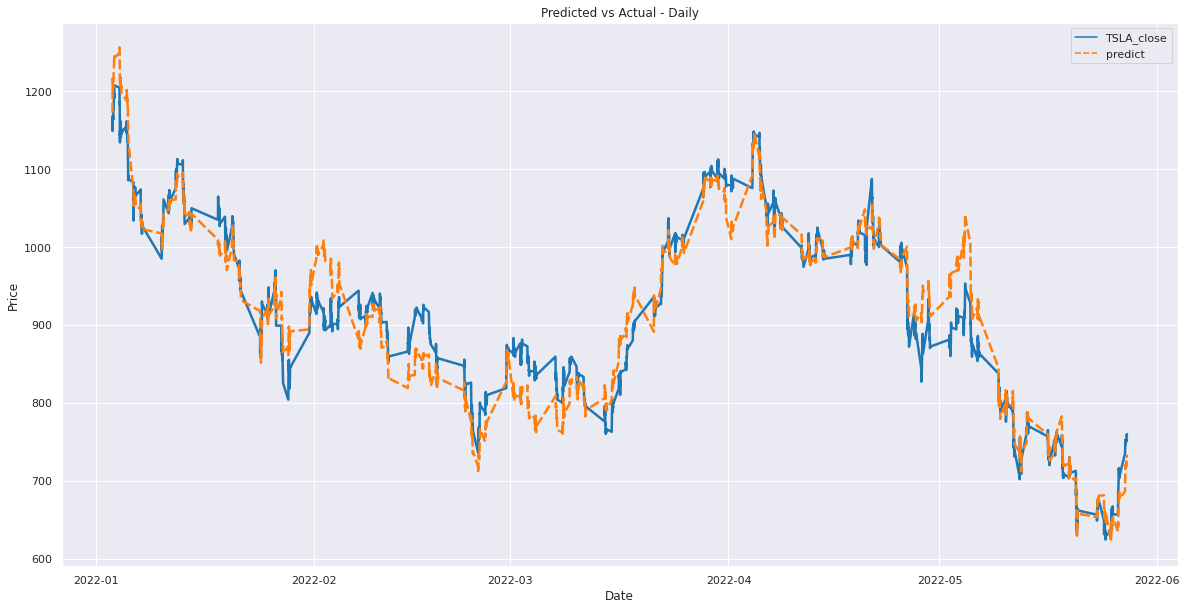

In [ ]:
plt.figure(figsize=(20,10))
linep = sns.lineplot(data=df_Result, palette="tab10", linewidth=2.5)
linep.set(xlabel='Date', ylabel='Price', title='Predicted vs Actual - Daily')
plt.show()

In [ ]:
mean_absolute_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

3.0420197314694484

In [ ]:
mean_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

-0.09792384211271628

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_Result['TSLA_close'],df_Result['predict'],squared=False)

35.143548752315176

In [ ]:
np.mean(count_time)

26.855833053588867